# EDA Using Unsupervised Learning - Hierarchical Clustering

The following notebooks implements exploratory data analysis using unsupervised learning method - hierarchical clustering.

Some of the code that has been used to perform hierarchical clustering can be found under following link:

https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis



In [1]:
# Import standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the data set
#data = pd.read_csv('/content/drive/MyDrive/Term2/CS5812/Files/Europe COVID statistics.csv', header = 0, index_col = 'date')
data = pd.read_csv('Europe COVID statistics.csv', header = 0, index_col = 'date')
data.head()

,Unnamed: 0,X,country,iso3c,confirmed,deaths,recovered,new.d,new.c,new.r,population,death_rate,recovery_rate,infection_rate,continent
date,,,,,,,,,,,,,,,
2020-01-22,1513,1513,Albania,ALB,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
2020-01-23,1514,1514,Albania,ALB,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
2020-01-24,1515,1515,Albania,ALB,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
2020-01-25,1516,1516,Albania,ALB,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU
2020-01-26,1517,1517,Albania,ALB,0,0,0,0,0,0,2877800,0.0,0.0,0.0,EU


Import necessary functions created for this course

In [ ]:
from helper_functions import plot_dendrogram, display_factorial_planes, display_parallel_coordinates, addAlpha, display_parallel_coordinates_centroids

In [10]:
palette = sns.color_palette("bright", 10)

In [11]:
# Get rid of unnecessary columns
X = data.drop({'Unnamed: 0', 'X', 'iso3c', 'population', 'continent'}, axis = 1)
X.head()

,country,confirmed,deaths,recovered,new.d,new.c,new.r,death_rate,recovery_rate,infection_rate
date,,,,,,,,,,
2020-01-22,Albania,0,0,0,0,0,0,0.0,0.0,0.0
2020-01-23,Albania,0,0,0,0,0,0,0.0,0.0,0.0
2020-01-24,Albania,0,0,0,0,0,0,0.0,0.0,0.0
2020-01-25,Albania,0,0,0,0,0,0,0.0,0.0,0.0
2020-01-26,Albania,0,0,0,0,0,0,0.0,0.0,0.0


In [12]:
# Encode the 'country' column into numeric form
label = LabelEncoder()
X['country'] = label.fit_transform(X['country'])

In [13]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.69397911, -0.43511867, -0.44319058, ..., -0.48356632,
        -0.3065271 , -0.5650713 ],
       [-1.69397911, -0.43511867, -0.44319058, ..., -0.48356632,
        -0.3065271 , -0.5650713 ],
       [-1.69397911, -0.43511867, -0.44319058, ..., -0.48356632,
        -0.3065271 , -0.5650713 ],
       ...,
       [-0.4619943 , -0.43509064, -0.44319058, ..., -0.48356632,
        -0.3065271 , -0.5650713 ],
       [-0.4619943 , -0.43509064, -0.44319058, ..., -0.48356632,
        -0.3065271 , -0.5650713 ],
       [-0.4619943 , -0.43509064, -0.44319058, ..., -0.48356632,
        -0.3065271 , -0.5650713 ]])

### Perform Hierarchical Clustering:

In [14]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True)  

In [15]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters = 4)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster

array([ 1815, 13155,  1227,  9048])

In [16]:
# Read off 4 clusters: (five have also been tried)
hiercluster.set_params(n_clusters = 4)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters)

array([ 1815, 13155,  1227,  9048])

In [17]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,country,confirmed,deaths,recovered,new.d,new.c,new.r,death_rate,recovery_rate,infection_rate,cluster
date,,,,,,,,,,,
2020-01-22,-1.693979,-0.435119,-0.443191,-0.341405,-0.359211,-0.371767,-0.314427,-0.483566,-0.306527,-0.565071,3
2020-01-23,-1.693979,-0.435119,-0.443191,-0.341405,-0.359211,-0.371767,-0.314427,-0.483566,-0.306527,-0.565071,3
2020-01-24,-1.693979,-0.435119,-0.443191,-0.341405,-0.359211,-0.371767,-0.314427,-0.483566,-0.306527,-0.565071,3
2020-01-25,-1.693979,-0.435119,-0.443191,-0.341405,-0.359211,-0.371767,-0.314427,-0.483566,-0.306527,-0.565071,3
2020-01-26,-1.693979,-0.435119,-0.443191,-0.341405,-0.359211,-0.371767,-0.314427,-0.483566,-0.306527,-0.565071,3


In [18]:
# Find the size of the clusters
X_scaled_clustered["cluster"].value_counts()

1    13155
3     9048
0     1815
2     1227
Name: cluster, dtype: int64

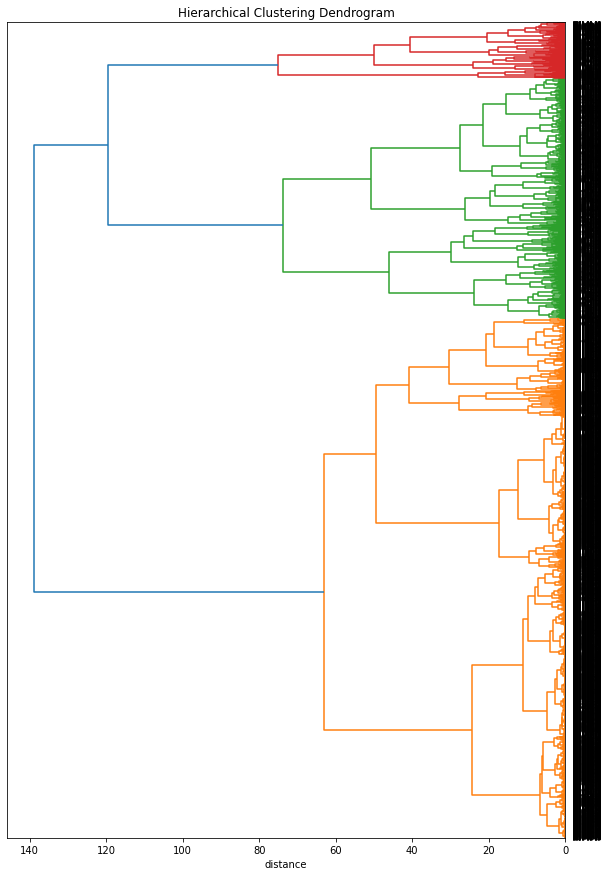

In [19]:
# Show a dendrogram, just for the first smallest cluster
from scipy.cluster.hierarchy import linkage, fcluster 
sample = X_scaled_clustered[X_scaled_clustered.cluster==1]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,15))

In [21]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transform the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [22]:
# Data frame with principal components:

X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
date,,,
2020-01-22,-1.272206,-0.362402,3
2020-01-23,-1.272206,-0.362402,3
2020-01-24,-1.272206,-0.362402,3
2020-01-25,-1.272206,-0.362402,3
2020-01-26,-1.272206,-0.362402,3


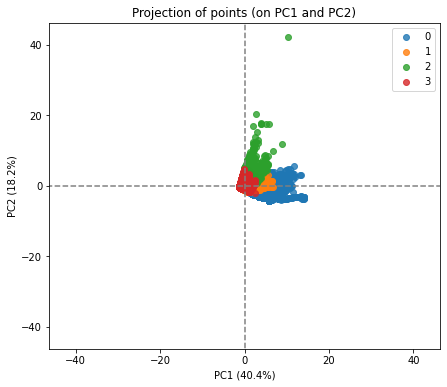

In [23]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

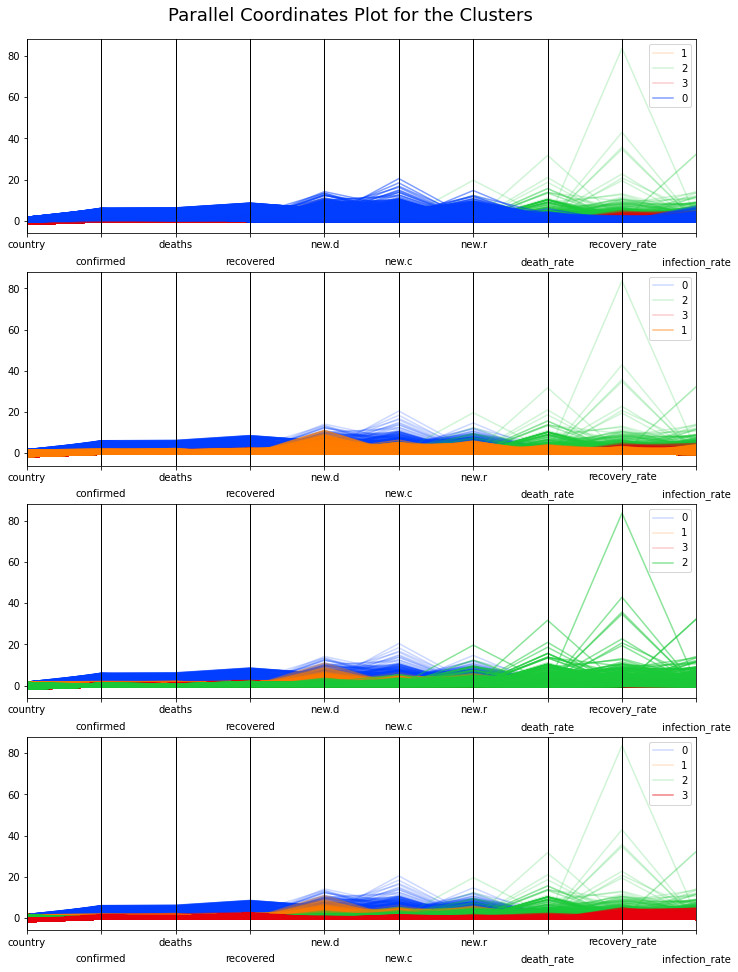

In [24]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 4)

In [25]:
# Compute centroids in each cluster:
means =  X_clustered.groupby(by="cluster").mean()

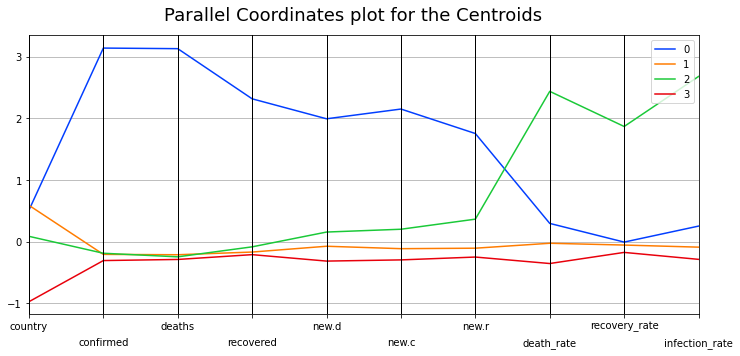

In [26]:
# Display parallel coordinates for the centroids:
display_parallel_coordinates_centroids(means.reset_index(), 5)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd65e857a50>,
      dtype=object)

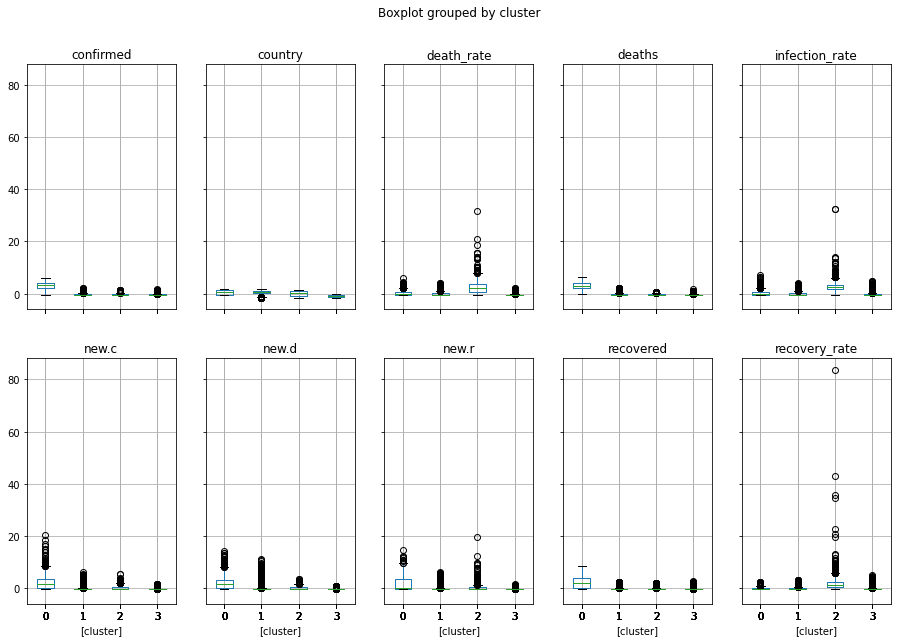

In [27]:
X_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))